In [1]:
import json,pandas as pd,pylab as pl,numpy as np

In [2]:
%run ../input/python-recipes/dhtml.py
dhtml('Plotting Style - "a Couple of Code Rows"')

In [3]:
colors=['#3636ff','#ff3636','#36ff36',
        '#ff36ff','#ffff36','#36ffff']
user='https://raw.githubusercontent.com/OlgaBelitskaya/'
path='machine_learning_engineer_nd009/'+\
     'master/Machine_Learning_Engineer_ND_P3/'
data=pd.read_csv(user+path+'customers.csv')

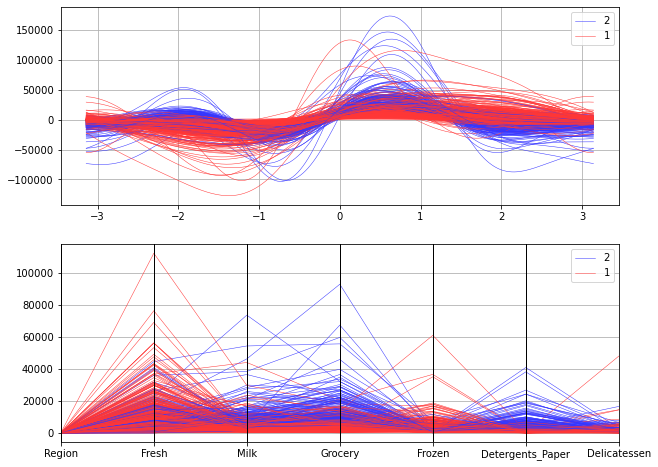

In [4]:
fig=pl.figure(figsize=(10,8))
ax1=fig.add_subplot('211')
params={'frame':data,'class_column':'Channel',
        'lw':.5,'color':colors}
pd.plotting.andrews_curves(**params,ax=ax1)
ax2=fig.add_subplot('212')
pd.plotting.parallel_coordinates(**params,ax=ax2);

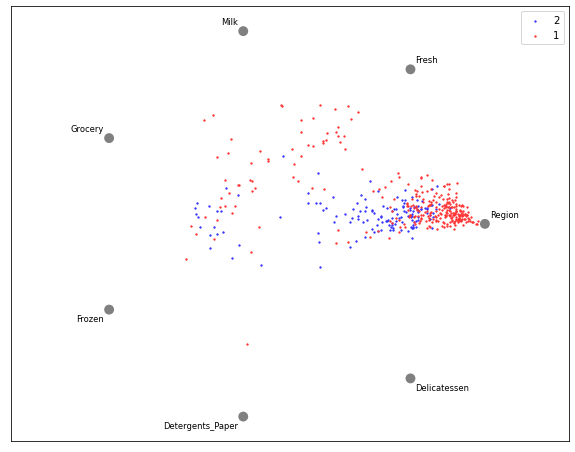

In [5]:
pl.figure(figsize=(10,8))
pd.plotting.radviz(**params,s=3)
pl.xticks([]); pl.yticks([]); 

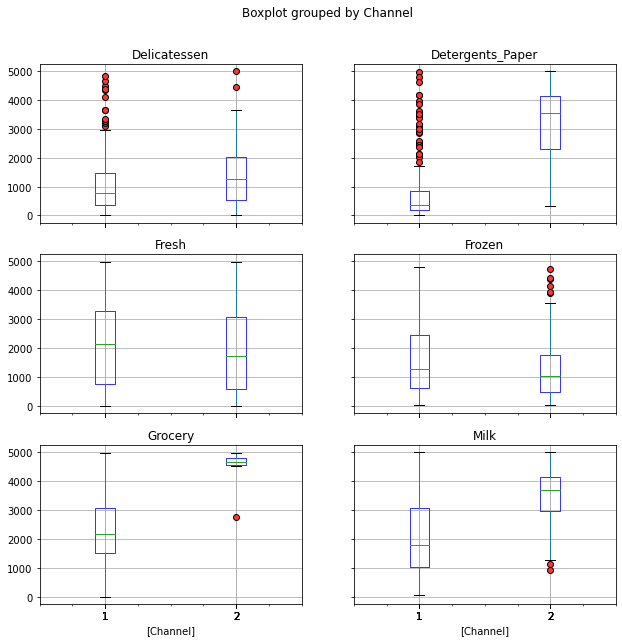

In [6]:
data[data<5000].drop('Region',axis=1)\
.boxplot(by='Channel',figsize=(10,10),
         boxprops={'color':colors[0]},
         flierprops={'markerfacecolor':colors[1]});

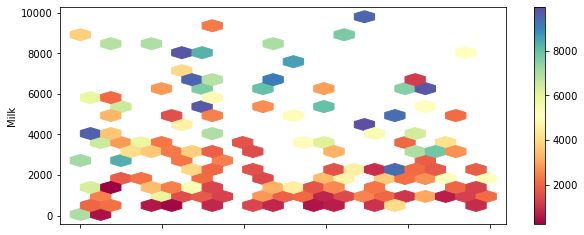

In [7]:
data[data<10000].plot.hexbin(
    x='Fresh',y='Milk',C='Grocery',
    reduce_C_function=np.mean,gridsize=20,
    cmap='Spectral',figsize=(10,4))
pl.show()

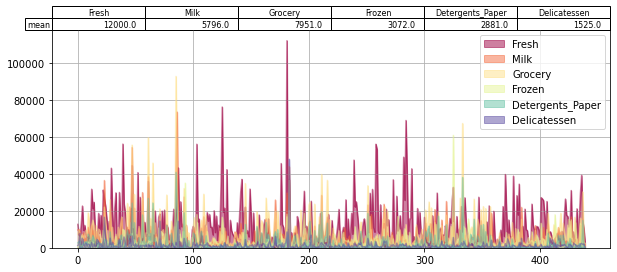

In [8]:
fig=pl.figure(figsize=(10,4))
ax=fig.add_subplot('111')
data.iloc[:,int(2):].plot.area(
    stacked=False,ax=ax,cmap='Spectral')
data_mean=pd.DataFrame(
    data.iloc[:,int(2):].mean().round()).T
data_mean.index=['mean']
pd.plotting.table(ax,data_mean,loc='top')
pl.grid();

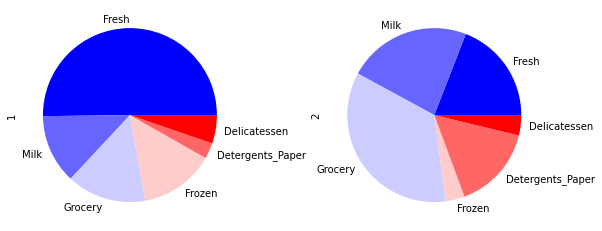

In [9]:
data.drop('Region',axis=1).groupby('Channel').sum().T\
.plot.pie(subplots=True,figsize=(10,4),
          legend=False,cmap='bwr');

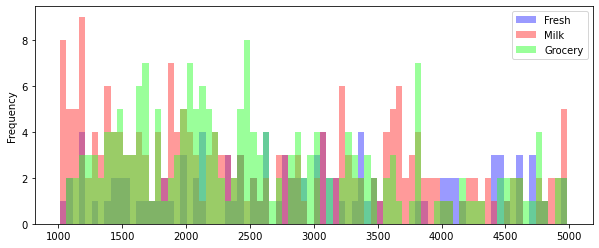

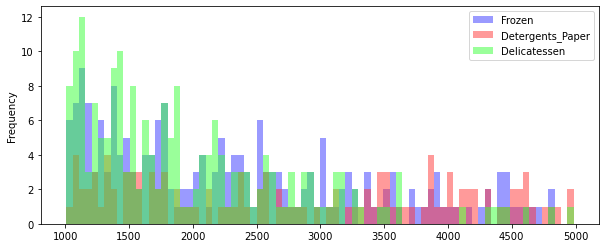

In [10]:
data_range=data.iloc[:,2:][(data<5000)&(data>1000)]
params={'bins':80,'alpha':.5,
        'figsize':(10,4),'color':colors}
data_range.iloc[:,:3].plot.hist(**params)
data_range.iloc[:,3:].plot.hist(**params);

In [11]:
dhtml('Data Transformation')

In [12]:
import json,pandas as pd,pylab as pl
url='https://www.ecb.europa.eu/stats/policy_and_exchange_rates/'+\
    'euro_reference_exchange_rates/html/index.en.html'
exchange_rates=pd.read_html(url)[0]\
.drop('Chart',axis=1)
exchange_rates.to_hdf('exchange_rates.h5',key='spot',mode='w')
pd.read_hdf('exchange_rates.h5','spot').head(7).T

,0,1,2,3,4,5,6
Currency,USD,JPY,BGN,CZK,DKK,GBP,HUF
Currency.1,US dollar,Japanese yen,Bulgarian lev,Czech koruna,Danish krone,Pound sterling,Hungarian forint
Spot,1.2159,126.44,1.9558,26.518,7.4429,0.90282,358.57


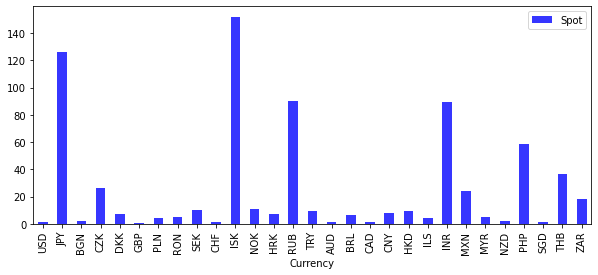

In [13]:
exchange_rates[exchange_rates['Spot']<200]\
.set_index('Currency').plot.bar(
    figsize=(10,4),color=colors[0]);

In [14]:
exchange_rates_json=\
exchange_rates.to_json(orient='table')
exchange_rates_string=\
json.loads(exchange_rates_json)
n=json.dumps(exchange_rates_string).find('data')
n=json.dumps(exchange_rates_string).find('data')
for el in json.dumps(exchange_rates_string)[n+7:-1]\
.replace('[{','').replace('}]','').split('}, {'):
    print(el)

"index": 0, "Currency": "USD", "Currency.1": "US dollar", "Spot": 1.2159
"index": 1, "Currency": "JPY", "Currency.1": "Japanese yen", "Spot": 126.44
"index": 2, "Currency": "BGN", "Currency.1": "Bulgarian lev", "Spot": 1.9558
"index": 3, "Currency": "CZK", "Currency.1": "Czech koruna", "Spot": 26.518
"index": 4, "Currency": "DKK", "Currency.1": "Danish krone", "Spot": 7.4429
"index": 5, "Currency": "GBP", "Currency.1": "Pound sterling", "Spot": 0.90282
"index": 6, "Currency": "HUF", "Currency.1": "Hungarian forint", "Spot": 358.57
"index": 7, "Currency": "PLN", "Currency.1": "Polish zloty", "Spot": 4.4769
"index": 8, "Currency": "RON", "Currency.1": "Romanian leu", "Spot": 4.8725
"index": 9, "Currency": "SEK", "Currency.1": "Swedish krona", "Spot": 10.2578
"index": 10, "Currency": "CHF", "Currency.1": "Swiss franc", "Spot": 1.0822
"index": 11, "Currency": "ISK", "Currency.1": "Icelandic krona", "Spot": 152.1
"index": 12, "Currency": "NOK", "Currency.1": "Norwegian krone", "Spot": 10.65

In [15]:
dhtml('R DataFrames in Python Notebooks')

In [16]:
%run ../input/python-recipes/sage_call.py

Evaluation of SageMath cells is possible 
now with two additional syntax marks: 
the white space and the slash between code lines.


<Figure size 432x288 with 0 Axes>

In [17]:
%sage_autorun \
%%r \
library('MASS'); data(Boston); n<-dim(Boston)[1] \
svg(filename='Rplots.svg',width=8,height=6,pointsize=12, \
    onefile=T,family='courier',bg='whitesmoke', \
    antialias=c('default','none','gray','subpixel')) \
plot(Boston[,'lstat'],col='#3636ff',type='o',pch=13,cex=.6) \
grid(); dev.off()

In [18]:
%sage_autorun \
%%r \
svg(filename='Rplots.svg',width=8,height=6,pointsize=12, \
    onefile=T,family='courier',bg='ghostwhite', \
    antialias=c('default','none','gray','subpixel')) \
user<-'https://raw.githubusercontent.com/OlgaBelitskaya/' \
file<-paste0(user,'machine_learning_engineer_nd009/') \
file<-paste0(file,'master/Machine_Learning_Engineer_ND_P3/') \
file<-paste0(file,'customers.csv') \
customers<-read.csv(file) \
matplot(c(1:440),customers[,c(3,4,5,6,7,8)],type='l') \
legend('topright',colnames(customers[,c(3,4,5,6,7,8)]), \
       col=seq_len(6),pch=13,cex=.8) \
grid(); dev.off()

In [19]:
dhtml('Danfo DataFrames')

In [20]:
%%writefile danfo_csv.py
from IPython.core.display import display,HTML

def danfo_table_csv(url,columns,header_font_size):
    html_str="""<html><head><meta charset='UTF-8'>"""+\
    """<meta name='viewport' """+\
    """content='width=device-width,initial-scale=1.0'>"""+\
    """<script src='https://cdn.jsdelivr.net/npm/"""+\
    """danfojs@0.1.1/dist/index.min.js'></script></head>"""+\
    """<div><p>&nbsp; CSV =>>> Danfo DataFrames</p>"""+\
    """<div id='div015_1'></div><script>"""+\
    """var url='"""+url+"""'; """+\
    """dfd.read_csv(url)"""+\
    """   .then(df=>{df.loc({columns:"""+str(columns)+\
    """}).plot('div015_1').table({header_style:"""+\
    """{font:{size:"""+str(header_font_size)+"""}}})})"""+\
    """   .catch(err=>{console.log(err);})"""+\
    """</script></div></html>"""
    display(HTML(html_str))
    
def danfo_chart_csv(url,columns,line_width,title):
    html_str="""<html><head><meta charset='UTF-8'>"""+\
    """<meta name='viewport' """+\
    """content='width=device-width,initial-scale=1.0'>"""+\
    """<script src='https://cdn.jsdelivr.net/npm/"""+\
    """danfojs@0.1.1/dist/index.min.js'> </script></head>"""+\
    """<body><p>&nbsp; CSV =>>> Danfo DataFrames</p>"""+\
    """<div id='div015_2'></div><script>"""+\
    """var url='"""+url+"""'; """+\
    """dfd.read_csv(url).then(df=>{var layout={"""+\
    """  title:'"""+title+\
    """',xaxis:{title:'columns'},"""+\
    """  yaxis:{title:'value'}}; """+\
    """  df.plot('div015_2').line({"""+\
    """line:{width:"""+str(line_width)+"""},"""+\
    """columns:"""+str(columns)+""",layout:layout})})"""+\
    """   .catch(err=>{console.log(err);})"""+\
    """</script></body></html>"""
    display(HTML(html_str))

Writing danfo_csv.py


In [21]:
%run danfo_csv.py
url='https://raw.githubusercontent.com/OlgaBelitskaya/'+\
    'machine_learning_engineer_nd009/master/'+\
    'Machine_Learning_Engineer_ND_P3/customers.csv'
columns=['Fresh','Milk','Grocery','Frozen',
         'Detergents_Paper','Delicatessen']
danfo_table_csv(url,columns,10)

In [22]:
danfo_chart_csv(url,columns,1,'Customers')

In [23]:
from IPython.display import IFrame
IFrame(src='https://olgabelitskaya.github.io/'+\
       'instagram15.html',
       width=680,height=670)